### 2021 Tokyo Olympics Dataset

In [63]:
#Importing the required modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.simplefilter("ignore")
import os

In [53]:
#Importing the datasets
athlete_data = pd.read_excel("Athletes.xlsx")
coach_data = pd.read_excel("Coaches.xlsx")
gender_data = pd.read_excel("EntriesGender.xlsx")
medal_data = pd.read_excel("Medals.xlsx")
team_data = pd.read_excel("Teams.xlsx")

In [48]:
df = medal_data
df.head()#first few rows for medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [26]:
df.columns

Index(['Rank', 'Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total',
       'Rank by Total'],
      dtype='object')

In [8]:
df.info()# Medals info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [9]:
df.isnull().sum() #No missing values in dataset

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

### Country with most gold medals, most silver and most bronze,  least. Bar plot illustration.  

In [11]:
#USA has most Gold,silver,bronze

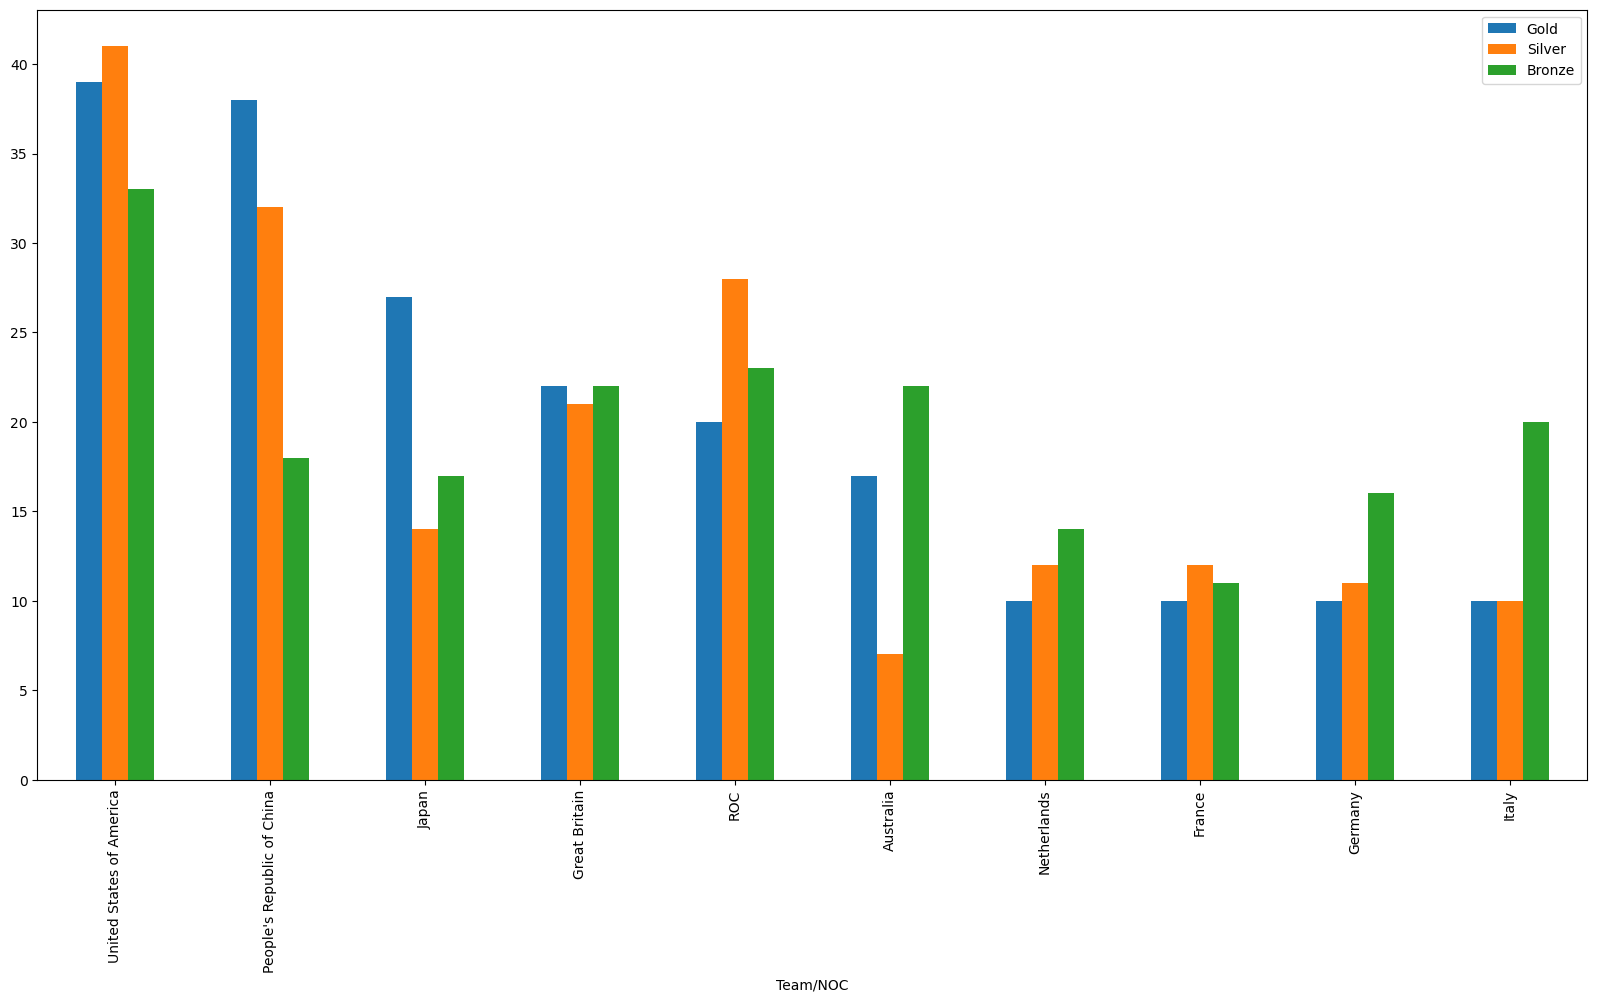

In [12]:
medal_data.copy()#Use .Copy() to get dataset
medal_won = medal_data.sort_values(['Gold', 'Silver', 'Bronze'],#sort columns to show gold, silver, bronze
ascending=False).set_index(['Team/NOC']).drop(['Rank by Total', 'Total', 'Rank'],axis=1)#setting index to Team
medal_won[0:10].plot.bar(figsize=(20,10));

### Country with the highest number of medals (Gold – Silver- Bronze) per capita

In [13]:
#European country, San Marino has highest per capita ratio of Gold to participants with ratio 0.75
country_medal = athlete_data.NOC.value_counts()
country_medal.to_frame()
country_medal =country_medal.reset_index()
country_medal=country_medal.rename(columns = {'index':'Team', 'NOC':'Number of Participants'})

merged_data = pd.merge(medal_data, country_medal,how = 'outer', left_on= 'Team/NOC', right_on= 'Team')
merged_data['Number Per Capita'] = merged_data['Total']/merged_data['Number of Participants']
merged_data.sort_values(by='Number Per Capita', ascending=False)[0:10].reset_index(drop=True)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Team,Number of Participants,Number Per Capita
0,72.0,San Marino,0.0,1.0,2.0,3.0,60.0,San Marino,4,0.750000
1,63.0,Bermuda,1.0,0.0,0.0,1.0,77.0,Bermuda,2,0.500000
2,69.0,Armenia,0.0,2.0,2.0,4.0,47.0,Armenia,16,0.250000
3,33.0,Georgia,2.0,5.0,1.0,8.0,29.0,Georgia,35,0.228571
4,5.0,ROC,20.0,28.0,23.0,71.0,3.0,ROC,318,0.223270
5,50.0,Philippines,1.0,2.0,1.0,4.0,47.0,Philippines,18,0.222222
6,2.0,People's Republic of China,38.0,32.0,18.0,88.0,2.0,People's Republic of China,401,0.219451
7,14.0,Cuba,7.0,3.0,5.0,15.0,18.0,Cuba,69,0.217391
8,41.0,Qatar,2.0,0.0,1.0,3.0,60.0,Qatar,14,0.214286
9,42.0,Kosovo,2.0,0.0,0.0,2.0,66.0,Kosovo,10,0.200000


### Countries with no medals

In [18]:
df.groupby('Total').min()

,Rank,Team/NOC,Gold,Silver,Bronze,Rank by Total
Total,,,,,,
1,63,Bahrain,0,0,0,77
2,42,Bahamas,0,0,0,66
3,38,Argentina,0,0,0,60
4,36,Armenia,0,0,0,47
5,31,Colombia,0,0,1,42
6,30,Bulgaria,1,1,2,39
7,27,Austria,0,1,2,33
8,20,Croatia,0,0,1,29
9,21,Jamaica,3,1,0,26


In [14]:
merged_data.loc[merged_data['Total'].isnull()] #We have 113 Countries without medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Team,Number of Participants,Number Per Capita
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chile,56,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria,41,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Montenegro,35,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peru,33,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trinidad and Tobago,31,NaN
...,...,...,...,...,...,...,...,...,...,...
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Republic of Tanzania,2,NaN
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saint Kitts and Nevis,2,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marshall Islands,2,NaN
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vanuatu,2,NaN


### Correlation Analysis of Medals

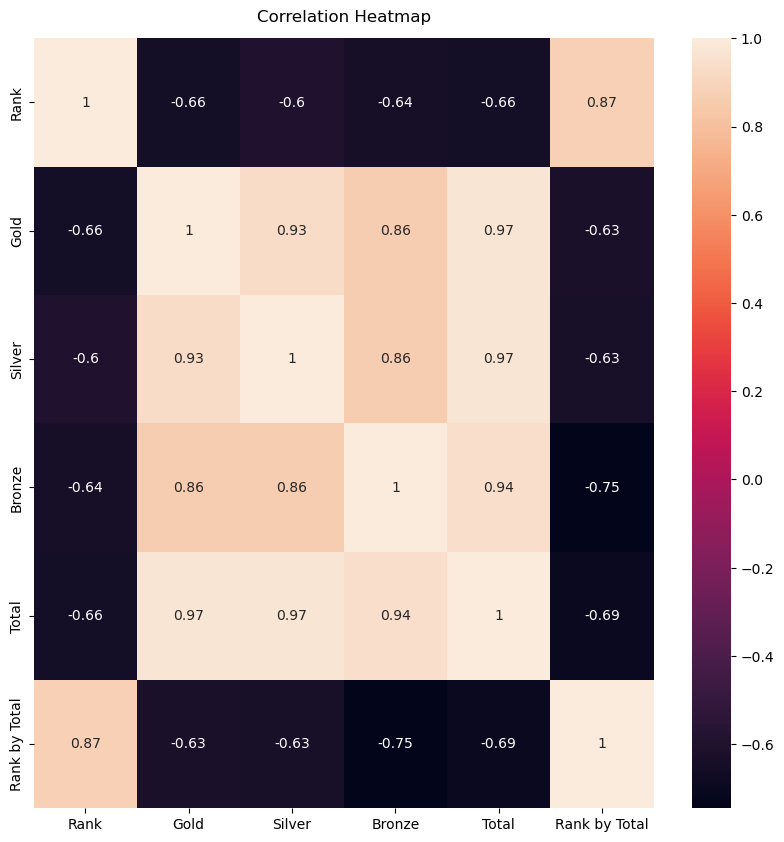

In [19]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Importing new dataset

In [77]:
dataset = pd.read_csv("Tokyo_dataset.xls")
dataset

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia
...,...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA,Africa
89,86,Grenada,0,0,1,1,77,GRN,North America
90,86,Kuwait,0,0,1,1,77,KUW,Africa
91,86,Republic of Moldova,0,0,1,1,77,MDA,Asia


### Bar plot of Total Medals by country

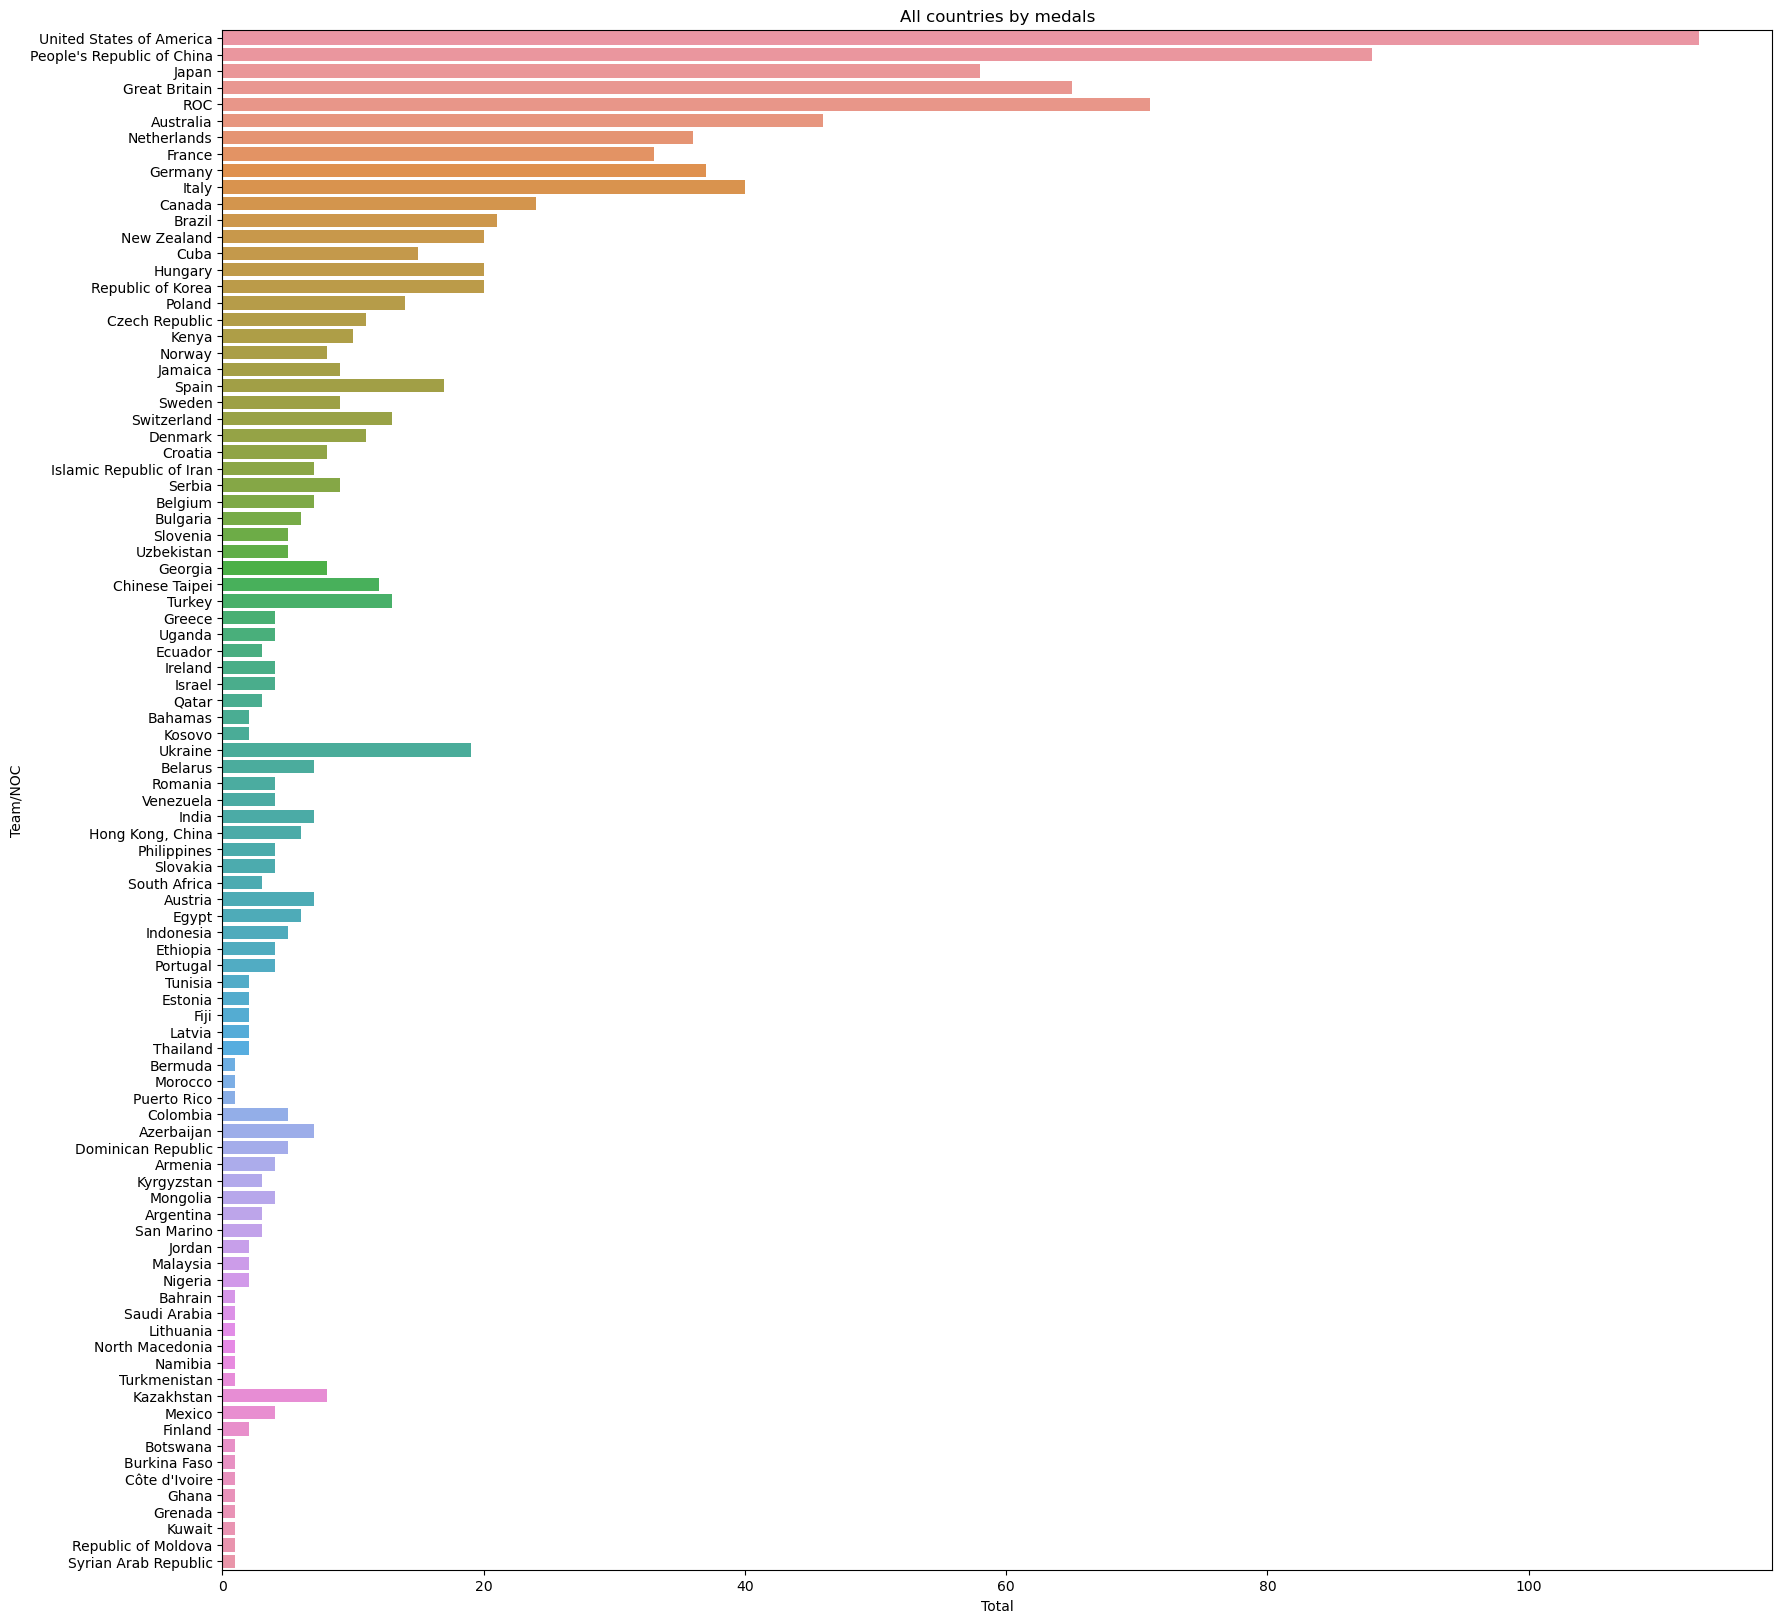

In [80]:
plt.figure(figsize=(20, 20))
plt.tight_layout()
sns.barplot(x='Total',y='Team/NOC',data=dataset)
plt.title('All countries by medals')
plt.show()


### Top ten countries Medal Analysis - Gold, Bronze, Silver

### No 1: Gold Medals

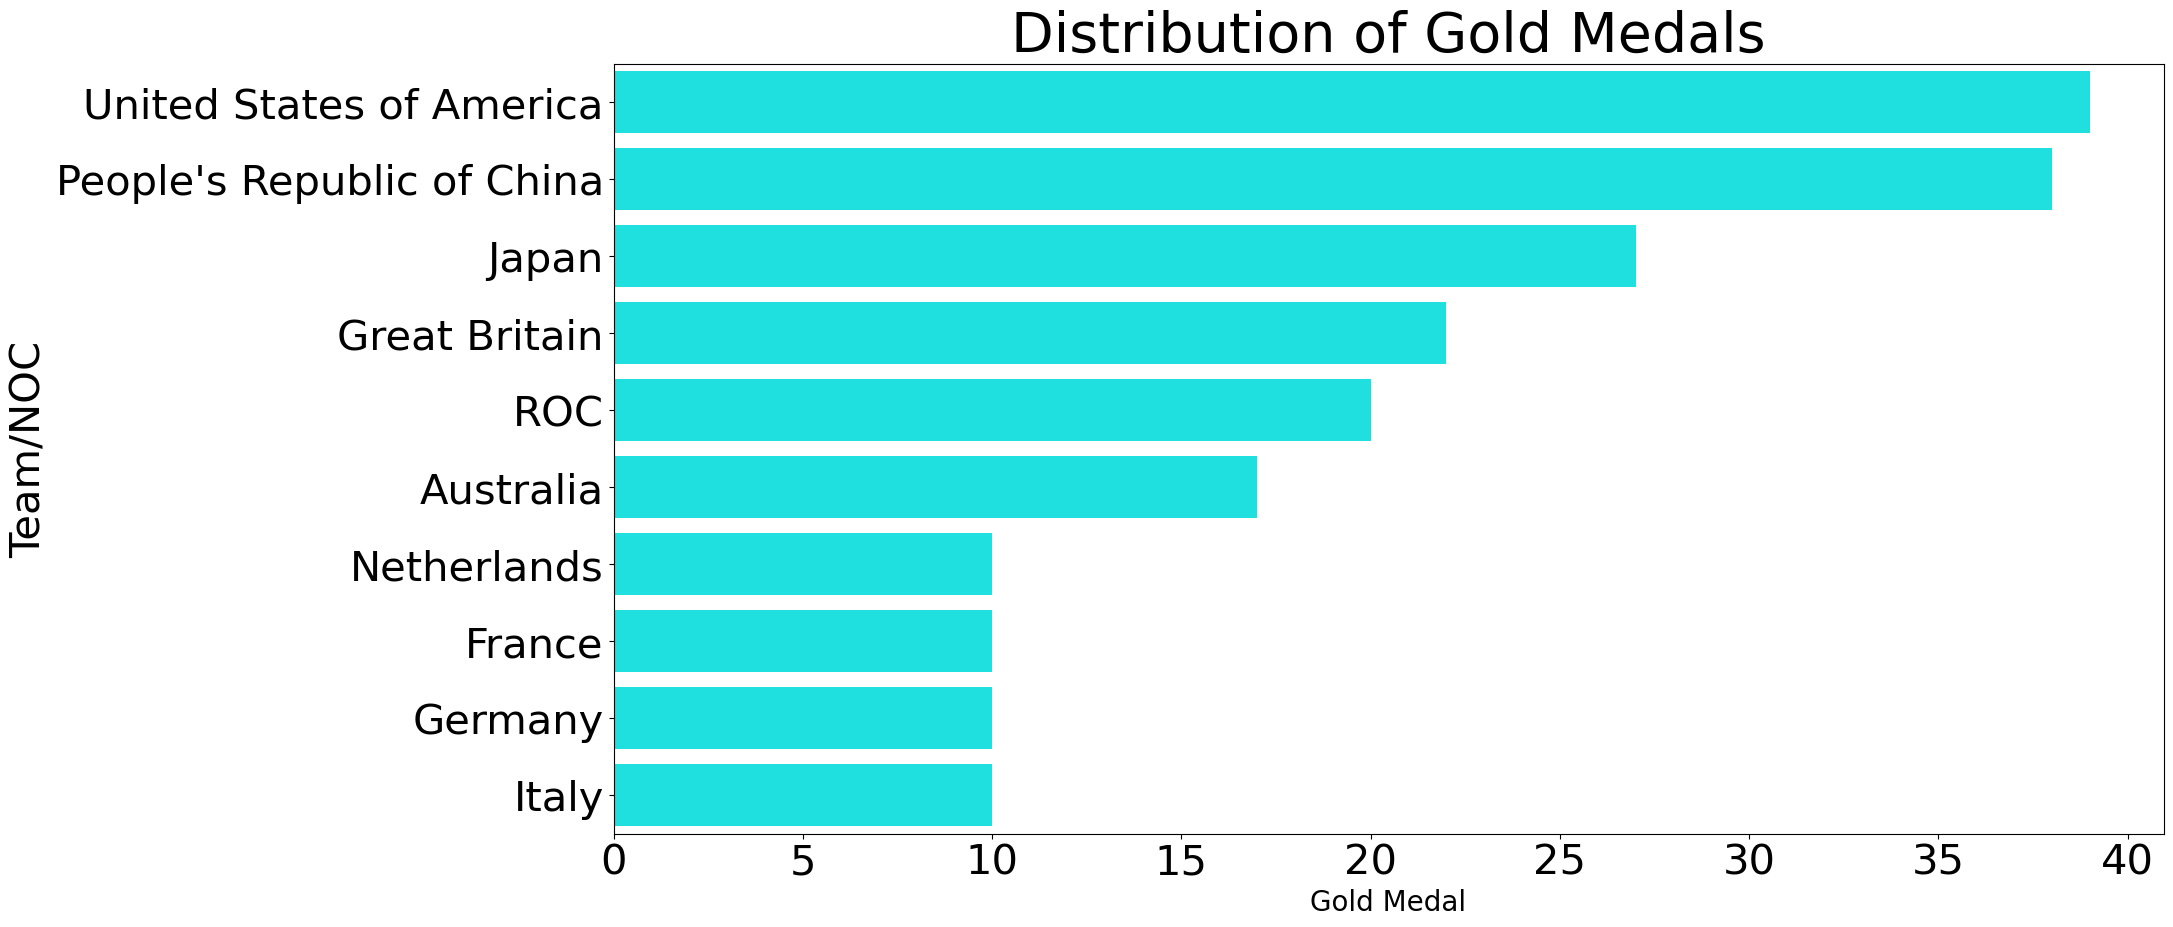

In [107]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.barplot(x='Gold Medal', y='Team/NOC',color = 'cyan',data=dataset[:10])
plt.title('Distribution of Gold Medals', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xlabel('Gold Medal', size = 20)
plt.ylabel('Team/NOC', size = 30)
plt.show()

### No 2: Silver Medals

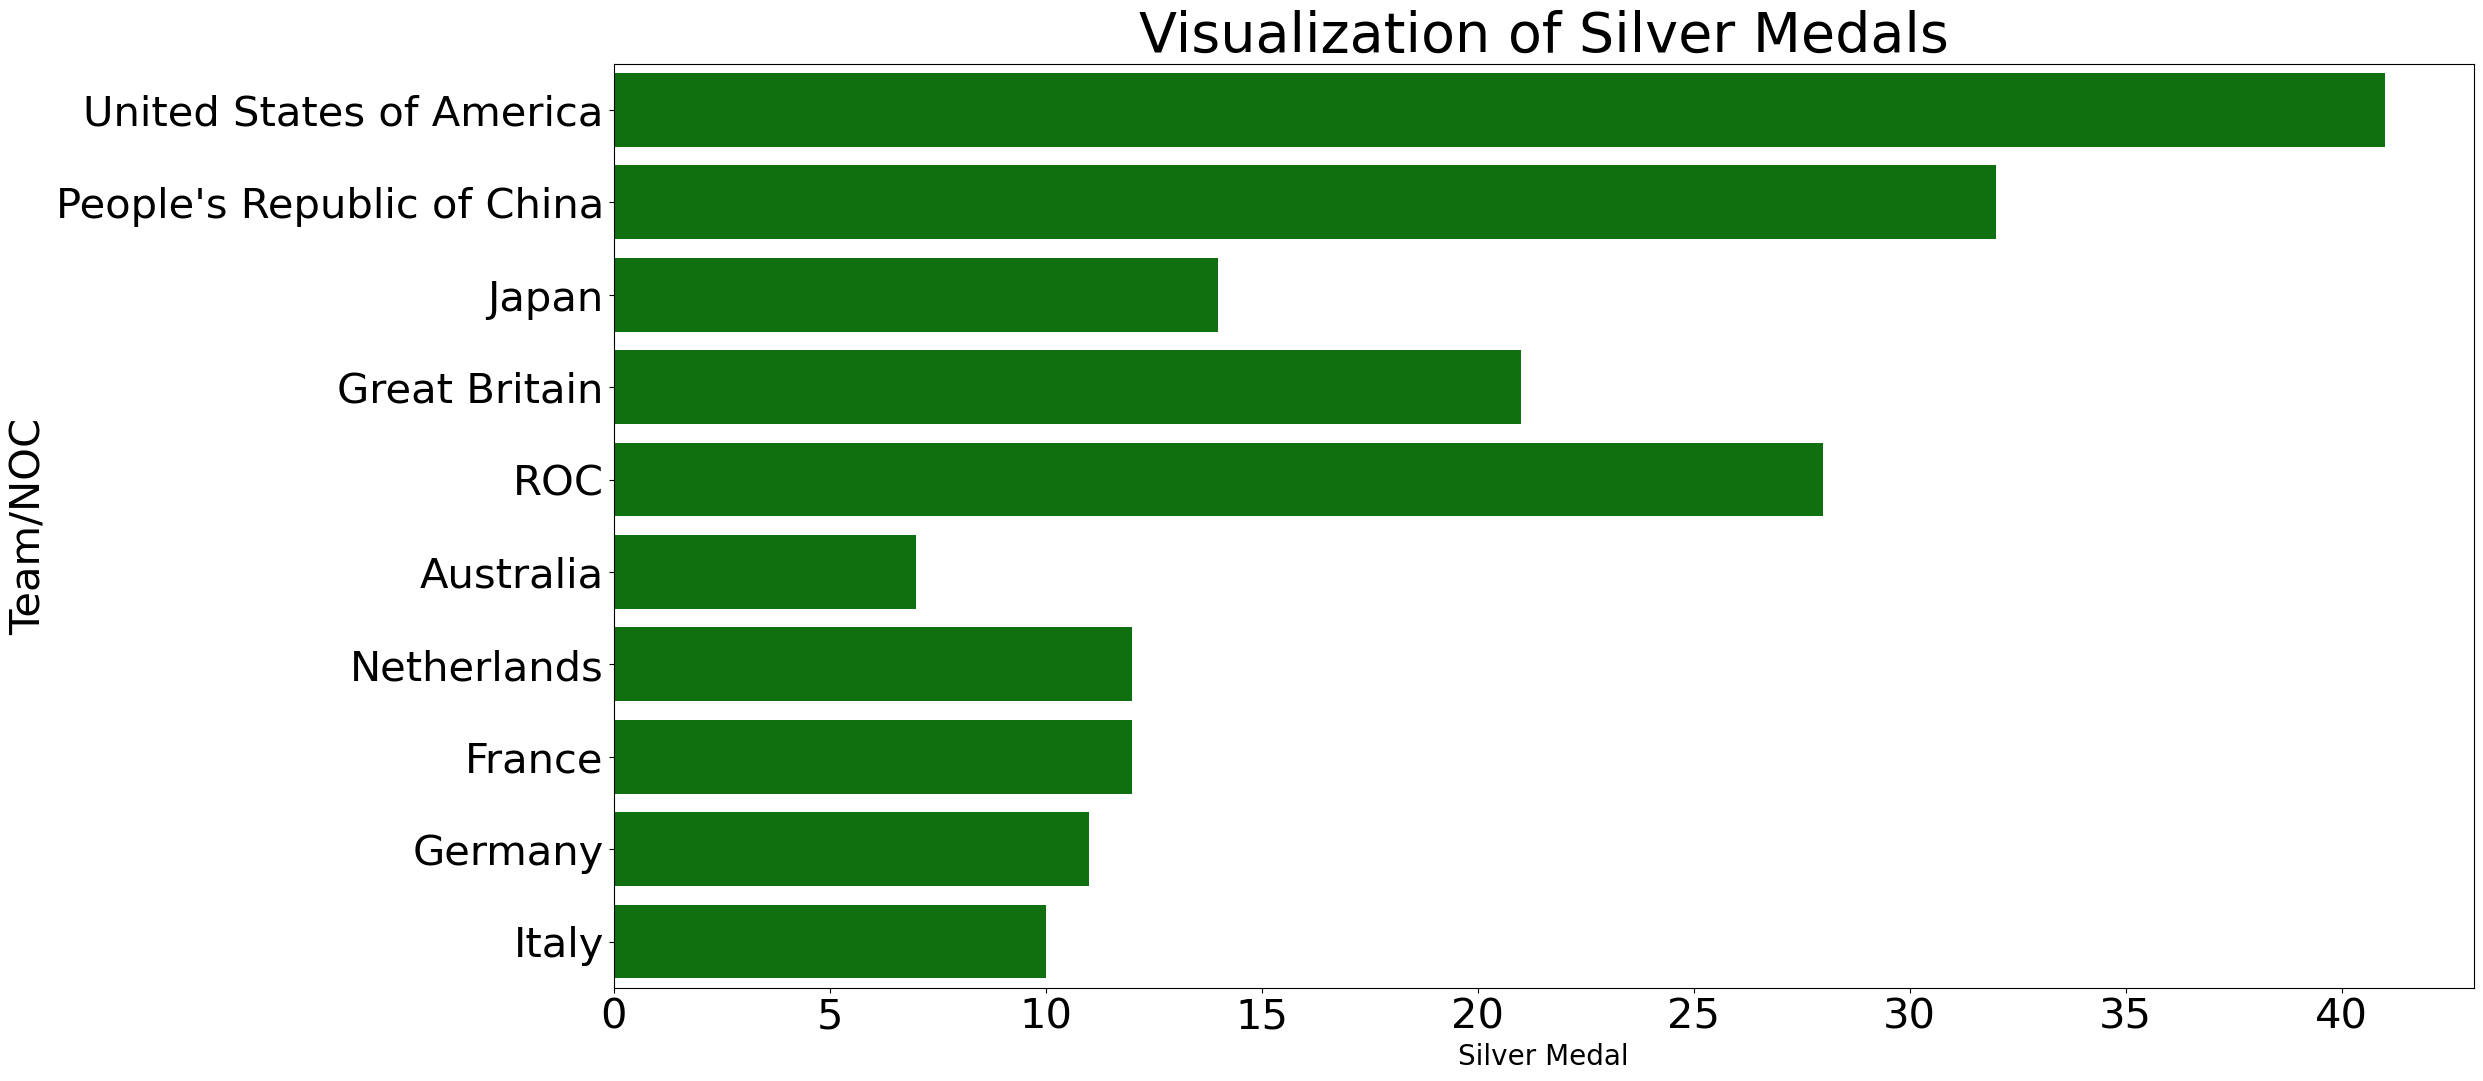

In [106]:
plt.figure(figsize=(24, 12))
plt.tight_layout()
sns.barplot(x='Silver Medal', y='Team/NOC',color='green',data=dataset[:10])
plt.title('Visualization of Silver Medals', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xlabel('Silver Medal', size = 20)
plt.ylabel('Team/NOC', size = 30)
plt.show()

### No 3: Bronze Medals

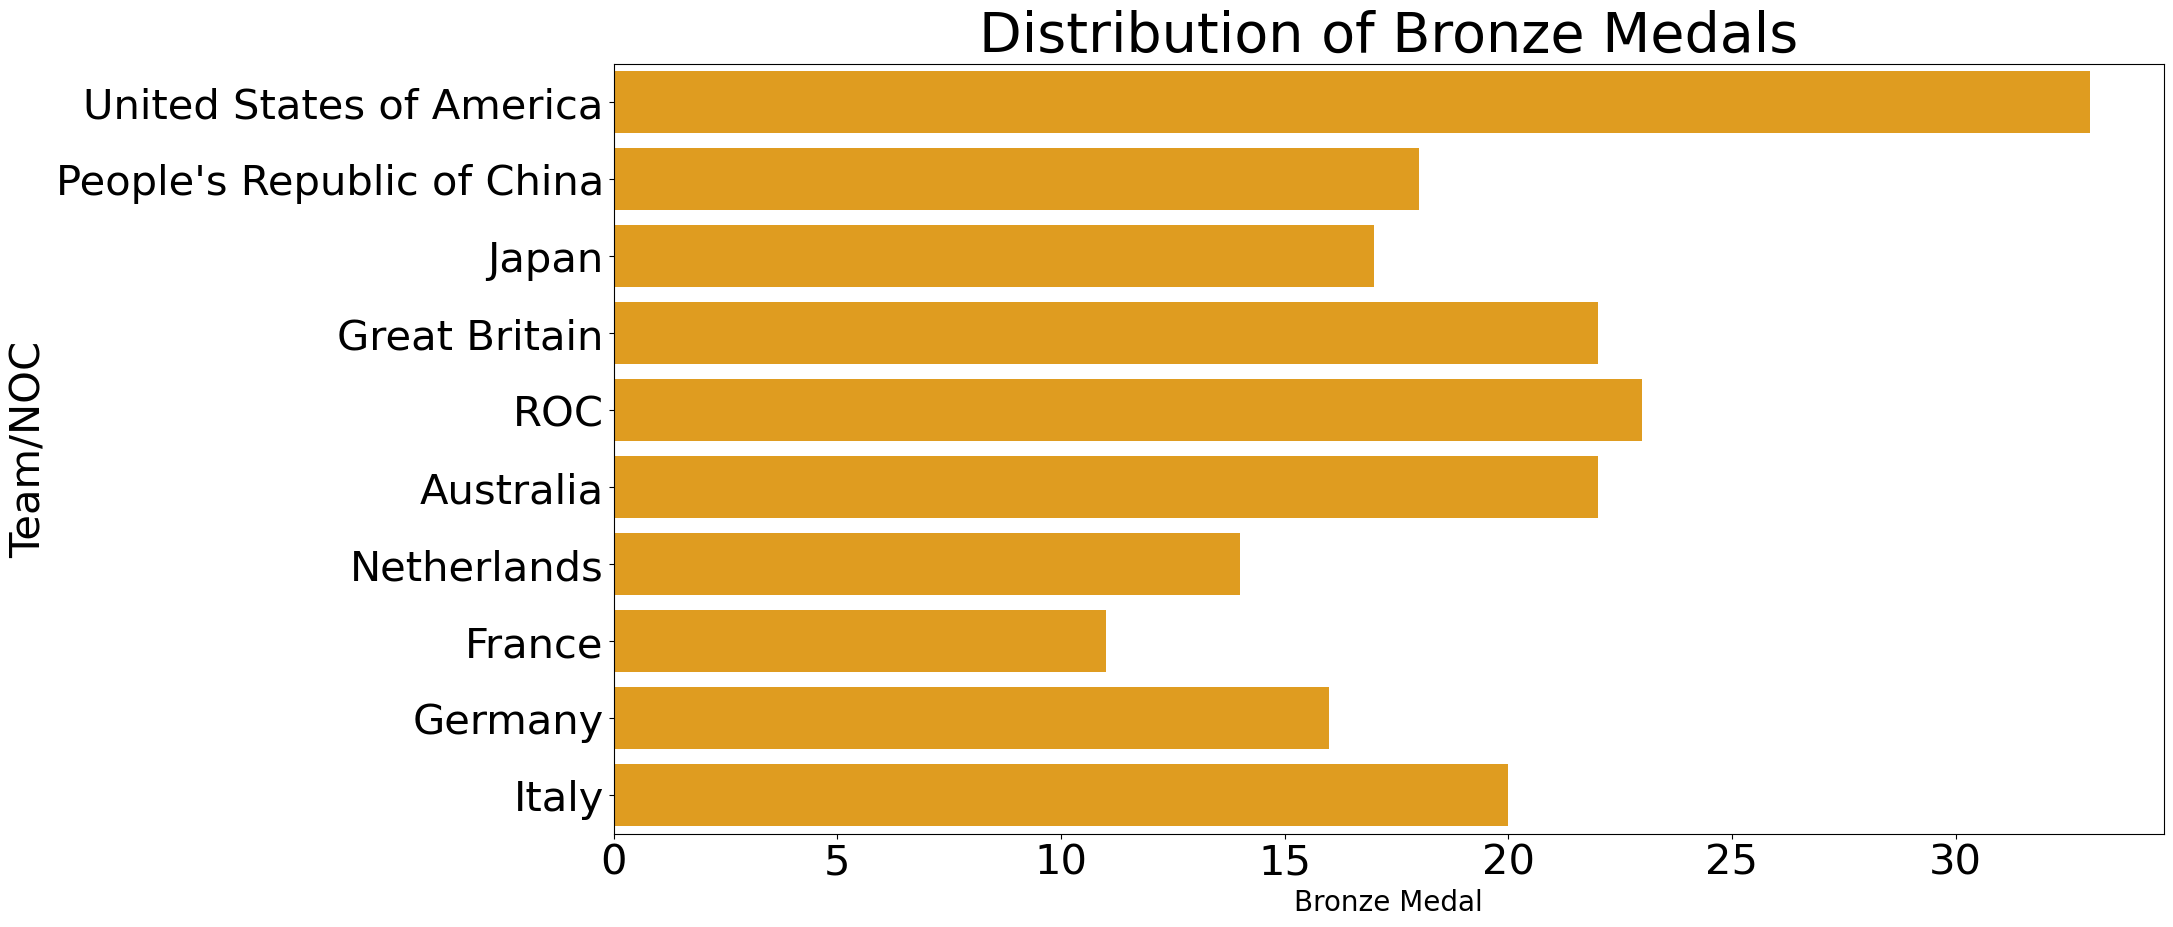

In [105]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.barplot(x='Bronze Medal',y='Team/NOC',color = 'orange',data=dataset[:10])
plt.title('Distribution of Bronze Medals', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xlabel('Bronze Medal', size = 20)
plt.ylabel('Team/NOC', size = 30)
plt.show()

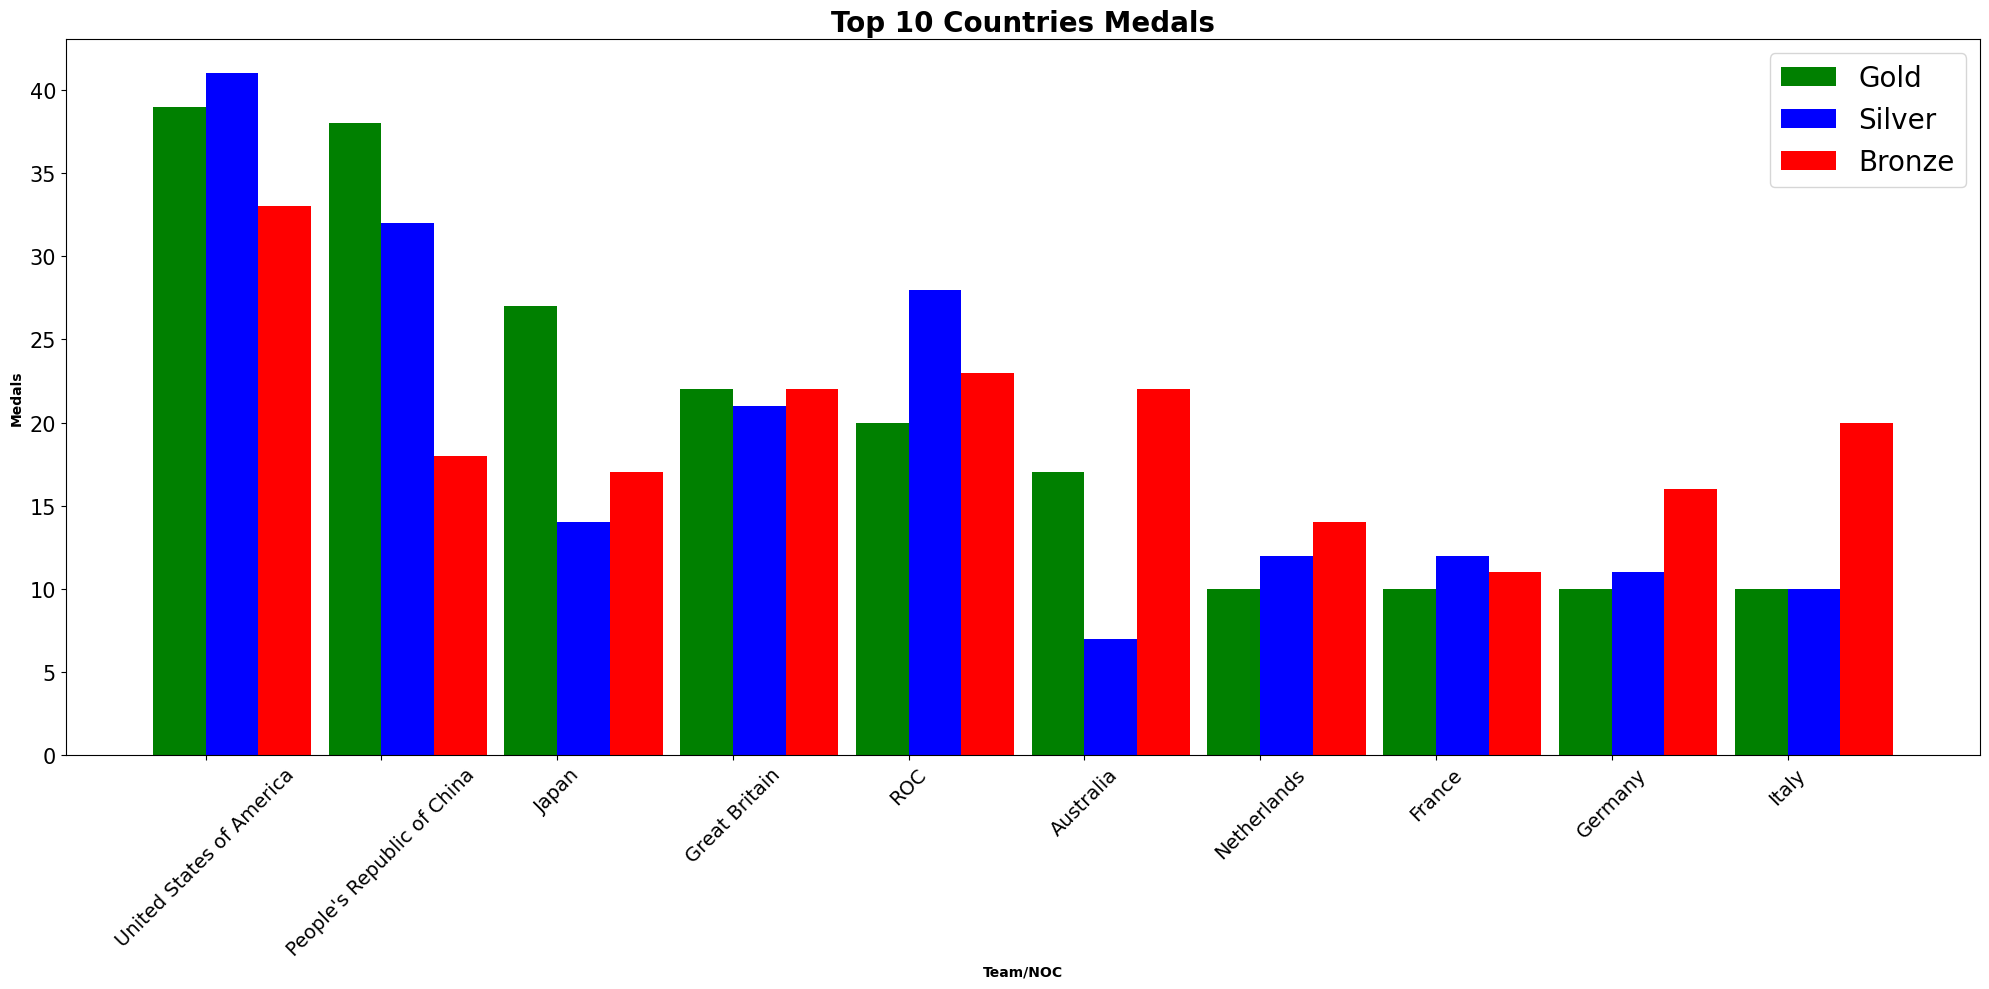

In [119]:
# these two source have been so helpful in understanding how to plot side by side bar plot
# https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged
# https://www.kaggle.com/sujan97/data-visualization-quick-guide
 
top_10 = dataset[:10]
fig,ax = plt.subplots(figsize = (20,10))

top_Teams = top_10['Team/NOC'].values
top_gold_medals = top_10['Gold Medal'].values
top_silver_medals = top_10['Silver Medal'].values
top_bronze_medals = top_10['Bronze Medal'].values
indices = 10 #Numbers of pairs of bars you want
ind = np.arange(indices) #Position of bars on x-axis

width = 0.3 
ax.bar(ind, top_gold_medals, data=top_10,width=width,color = 'green', label = 'Gold')
ax.bar(ind+width, top_silver_medals, data=top_10,width=width,color = 'blue', label = 'Silver')
ax.bar(ind+2*width, top_bronze_medals, data=top_10,width=width, color = 'red', label = 'Bronze')

plt.title('Top 10 Countries Medals', fontweight = 'bold', fontsize=20)
plt.xlabel('Team/NOC', fontsize = 10, fontweight = 'bold')
plt.ylabel('Medals', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(ind+width/2,top_Teams ,fontsize=14,rotation=45)
plt.tight_layout()
plt.show()

### Pie Chart Visualization

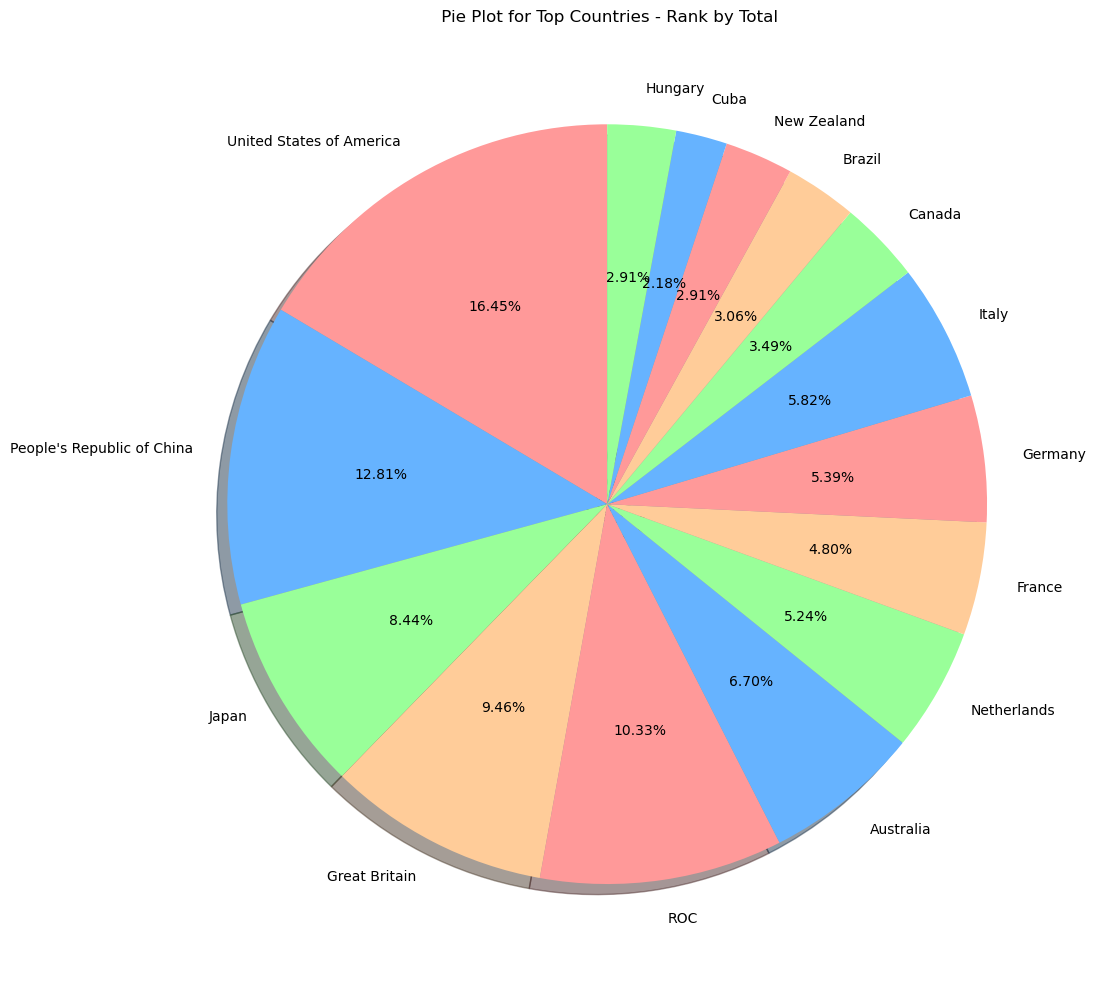

In [120]:
Top_countries = dataset['Team/NOC'][:15]
Top_countries_medals = dataset['Total'][:15]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

figure = plt.figure(figsize=(15,10))
plt.pie(Top_countries_medals, labels=Top_countries,
        colors = colors, shadow = True, startangle = 90, autopct='%1.2f%%')

plt.title(' Pie Plot for Top Countries - Rank by Total')
plt.tight_layout()
plt.show()
